In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.cm as cm
import matplotlib.colors as colors
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

In [2]:
import requests # library to handle requests
import random # library for random number generation

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geopy-1.20.0               |             py_0          57 KB  conda-forge
    certifi-2019.9.11          |           py36_0         147 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    openssl-1.1.1d             |       h516909a_0         2.1 MB  conda-forge
    ca-certificates-2019.9.11  |       hecc5488_0         144 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.50-py_0         conda-forge
    geopy:           1.20.0-py_0       conda-forge

The following packages will be UPDATED:

    cer

In [3]:
tables = pd.read_html("https://codigo-postal.co/en-us/mexico/oaxaca/oaxaca-de-juarez/",header=0)[0]
tables

,ZIP Code,Asentamiento,Municipality,State,Type
0,68016,Colonia 10 de Abril,Oaxaca de Juárez,Oaxaca,Urbano
1,68120,Colonia 5 Señores,Oaxaca de Juárez,Oaxaca,Urbano
2,68023,Colonia 7 Regiones,Oaxaca de Juárez,Oaxaca,Urbano
3,68023,Colonia 7 Regiones Ampliación,Oaxaca de Juárez,Oaxaca,Urbano
4,68274,Colonia 9 de Mayo,Oaxaca de Juárez,Oaxaca,Rural
5,68030,Colonia Adolfo López Mateos,Oaxaca de Juárez,Oaxaca,Urbano
6,68013,Colonia Adolfo López Mateos Zona Noreste,Oaxaca de Juárez,Oaxaca,Urbano
7,68050,Colonia América Norte,Oaxaca de Juárez,Oaxaca,Urbano
8,68104,Colonia América Sur,Oaxaca de Juárez,Oaxaca,Urbano
9,68028,Colonia Ampliación Dolores,Oaxaca de Juárez,Oaxaca,Urbano


In [4]:
tables.shape

(50, 5)

In [5]:
tables.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
ZIP Code        50 non-null int64
Asentamiento    50 non-null object
Municipality    50 non-null object
State           50 non-null object
Type            50 non-null object
dtypes: int64(1), object(4)
memory usage: 2.0+ KB


In [6]:
!pip install geocoder
import geocoder

     |████████████████████████████████| 102kB 13.4MB/s ta 0:00:01


In [7]:
def get_latlng(postal_code):
    # initialize your variable to None
    lat_lng_coords = None
    # loop until you get the coordinates
    while(lat_lng_coords is None):
        g = geocoder.arcgis('{}, Oaxaca city, Oaxaca'.format(postal_code))
        lat_lng_coords = g.latlng
    return lat_lng_coords
    
get_latlng('M4G')

[17.06173000000007, -96.72609999999997]

In [8]:
postal_codes = tables['ZIP Code']    
coords = [ get_latlng(postal_code) for postal_code in postal_codes.tolist() ]

In [9]:
df_coords = pd.DataFrame(coords, columns=['Latitude', 'Longitude'])
tables['Latitude'] = df_coords['Latitude']
tables['Longitude'] = df_coords['Longitude']

In [10]:
tables.head()

,ZIP Code,Asentamiento,Municipality,State,Type,Latitude,Longitude
0,68016,Colonia 10 de Abril,Oaxaca de Juárez,Oaxaca,Urbano,17.105055,-96.744470
1,68120,Colonia 5 Señores,Oaxaca de Juárez,Oaxaca,Urbano,17.053985,-96.716342
2,68023,Colonia 7 Regiones,Oaxaca de Juárez,Oaxaca,Urbano,17.099514,-96.698645
3,68023,Colonia 7 Regiones Ampliación,Oaxaca de Juárez,Oaxaca,Urbano,17.099514,-96.698645
4,68274,Colonia 9 de Mayo,Oaxaca de Juárez,Oaxaca,Rural,17.119610,-96.754748


In [11]:
tables.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
ZIP Code        50 non-null int64
Asentamiento    50 non-null object
Municipality    50 non-null object
State           50 non-null object
Type            50 non-null object
Latitude        50 non-null float64
Longitude       50 non-null float64
dtypes: float64(2), int64(1), object(4)
memory usage: 2.8+ KB


In [12]:
address = 'Oaxaca city, Oaxaca Mexico'

geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: DeprecationWarning: Using Nominatim with the default "geopy/1.20.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  app.launch_new_instance()


The geograpical coordinate of Toronto are 17.0604663, -96.7253575.


In [13]:
map_Oaxaca = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(tables['Latitude'], tables['Longitude'], tables['Asentamiento']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Oaxaca)  
    
map_Oaxaca

In [98]:
# The code was removed by Watson Studio for sharing.

In [15]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [16]:
Oaxaca_venues = getNearbyVenues(names=tables['Asentamiento'], latitudes=tables['Latitude'], longitudes=tables['Longitude'])

Colonia 10 de Abril
Colonia 5 Señores
Colonia 7 Regiones
Colonia 7 Regiones Ampliación
Colonia 9 de Mayo
Colonia Adolfo López Mateos
Colonia Adolfo López Mateos Zona Noreste
Colonia América Norte
Colonia América Sur
Colonia Ampliación Dolores
Colonia Ampliación Jardín
Colonia Ampliación Siete Regiones Parte Norte
Colonia Ampliación Volcanes
Colonia Arbolada Ilusión
Colonia Arboleda
Fraccionamiento Arboledas
Ejido Arroyo Loma de Trigo
Colonia Artículo 123 Oriente
Colonia Artículo 123 Poniente
Colonia Aurora
Fraccionamiento Aurora
Colonia Azucena
Colonia Azucenas
Colonia Benito Juárez
Unidad habitacional Benito Juárez
Colonia Bosque San Felipe
Colonia Buena Vista
Fraccionamiento Bugambilias
Colonia Bugambilias
Colonia California
Ejido Camino Ancho
Colonia Candiani
Fraccionamiento Casa del Sol
Ejido Casas del Sol
Zona comercial Centro Comercial Plaza del Valle
Equipamiento Centro de Convenciones
Colonia Cerro del Fortin
Fraccionamiento Colinas de la Soledad
Unidad habitacional Colinas de 

In [17]:
df=Oaxaca_venues.groupby('Neighborhood').count()
df

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Colonia 5 Señores,30,30,30,30,30,30
Colonia 7 Regiones,4,4,4,4,4,4
Colonia 7 Regiones Ampliación,4,4,4,4,4,4
Colonia 9 de Mayo,3,3,3,3,3,3
Colonia Adolfo López Mateos,9,9,9,9,9,9
Colonia Ampliación Dolores,5,5,5,5,5,5
Colonia Ampliación Jardín,4,4,4,4,4,4
Colonia Ampliación Siete Regiones Parte Norte,4,4,4,4,4,4
Colonia Ampliación Volcanes,9,9,9,9,9,9


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45 entries, Colonia 5 Señores to Zona comercial Centro Comercial Plaza del Valle
Data columns (total 6 columns):
Neighborhood Latitude     45 non-null int64
Neighborhood Longitude    45 non-null int64
Venue                     45 non-null int64
Venue Latitude            45 non-null int64
Venue Longitude           45 non-null int64
Venue Category            45 non-null int64
dtypes: int64(6)
memory usage: 2.5+ KB


In [19]:
print('There are {} uniques categories.'.format(len(Oaxaca_venues['Venue Category'].unique())))

There are 110 uniques categories.


In [20]:
Oaxaca_onehot = pd.get_dummies(Oaxaca_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Oaxaca_onehot['Neighborhood'] = Oaxaca_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [Oaxaca_onehot.columns[-1]] + list(Oaxaca_onehot.columns[:-1])
Oaxaca_onehot = Oaxaca_onehot[fixed_columns]

Oaxaca_onehot.head()

,Neighborhood,ATM,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Automotive Shop,BBQ Joint,Bakery,Bar,...,Sporting Goods Shop,Steakhouse,Supermarket,Sushi Restaurant,Taco Place,Theater,Track Stadium,Vegetarian / Vegan Restaurant,Warehouse Store,Women's Store
0,Colonia 5 Señores,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Colonia 5 Señores,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,Colonia 5 Señores,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Colonia 5 Señores,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Colonia 5 Señores,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
Oaxaca_grouped = Oaxaca_onehot.groupby('Neighborhood').mean().reset_index()
Oaxaca_grouped

,Neighborhood,ATM,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Automotive Shop,BBQ Joint,Bakery,Bar,...,Sporting Goods Shop,Steakhouse,Supermarket,Sushi Restaurant,Taco Place,Theater,Track Stadium,Vegetarian / Vegan Restaurant,Warehouse Store,Women's Store
0,Colonia 5 Señores,0.000000,0.000000,0.0,0.033333,0.033333,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.100000,0.033333,0.000000,0.033333,0.000000,0.000000,0.000000,0.000000,0.000000
1,Colonia 7 Regiones,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,Colonia 7 Regiones Ampliación,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,Colonia 9 de Mayo,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,Colonia Adolfo López Mateos,0.111111,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000
5,Colonia Ampliación Dolores,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000
6,Colonia Ampliación Jardín,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,Colonia Ampliación Siete Regiones Parte Norte,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,Colonia Ampliación Volcanes,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,Colonia América Norte,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.033333,0.133333,0.066667,...,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000


In [22]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [23]:
num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = Oaxaca_grouped['Neighborhood']

for ind in np.arange(Oaxaca_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Oaxaca_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Colonia 5 Señores,Restaurant,Steakhouse,Pizza Place,Convenience Store,Candy Store
1,Colonia 7 Regiones,BBQ Joint,Spa,Soccer Field,Pharmacy,Women's Store
2,Colonia 7 Regiones Ampliación,BBQ Joint,Spa,Soccer Field,Pharmacy,Women's Store
3,Colonia 9 de Mayo,Playground,Bakery,Fast Food Restaurant,Doctor's Office,Clothing Store
4,Colonia Adolfo López Mateos,Taco Place,ATM,Hotel,Racetrack,Café


In [25]:
Oaxaca_grouped_clustering = Oaxaca_grouped.drop('Neighborhood', 1)

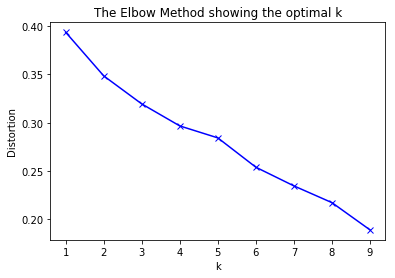

In [61]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(Oaxaca_grouped_clustering)
    distortions.append(sum(np.min(cdist(Oaxaca_grouped_clustering, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / Oaxaca_grouped_clustering.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [33]:
kclusters = 4

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Oaxaca_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:5]

array([3, 0, 0, 3, 1], dtype=int32)

In [62]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

Oaxaca_merged = tables
Oaxaca_merged.columns = ["ZIP Code","Neighborhood", "Municipality", "State", "Type", "Latitude", "Longitude"]

In [63]:
# merge Oaxaca_grouped with tables to add latitude/longitude for each neighborhood
Oaxaca_merged = Oaxaca_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

Oaxaca_merged.head()

,ZIP Code,Neighborhood,Municipality,State,Type,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,68016,Colonia 10 de Abril,Oaxaca de Juárez,Oaxaca,Urbano,17.105055,-96.744470,NaN,NaN,NaN,NaN,NaN,NaN
1,68120,Colonia 5 Señores,Oaxaca de Juárez,Oaxaca,Urbano,17.053985,-96.716342,3.0,Restaurant,Steakhouse,Pizza Place,Convenience Store,Candy Store
2,68023,Colonia 7 Regiones,Oaxaca de Juárez,Oaxaca,Urbano,17.099514,-96.698645,0.0,BBQ Joint,Spa,Soccer Field,Pharmacy,Women's Store
3,68023,Colonia 7 Regiones Ampliación,Oaxaca de Juárez,Oaxaca,Urbano,17.099514,-96.698645,0.0,BBQ Joint,Spa,Soccer Field,Pharmacy,Women's Store
4,68274,Colonia 9 de Mayo,Oaxaca de Juárez,Oaxaca,Rural,17.119610,-96.754748,3.0,Playground,Bakery,Fast Food Restaurant,Doctor's Office,Clothing Store


In [64]:
Oaxaca_merged.dropna(inplace=True)
Oaxaca_merged.reset_index(drop=True, inplace=True)
Oaxaca_merged

,ZIP Code,Neighborhood,Municipality,State,Type,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,68120,Colonia 5 Señores,Oaxaca de Juárez,Oaxaca,Urbano,17.053985,-96.716342,3.0,Restaurant,Steakhouse,Pizza Place,Convenience Store,Candy Store
1,68023,Colonia 7 Regiones,Oaxaca de Juárez,Oaxaca,Urbano,17.099514,-96.698645,0.0,BBQ Joint,Spa,Soccer Field,Pharmacy,Women's Store
2,68023,Colonia 7 Regiones Ampliación,Oaxaca de Juárez,Oaxaca,Urbano,17.099514,-96.698645,0.0,BBQ Joint,Spa,Soccer Field,Pharmacy,Women's Store
3,68274,Colonia 9 de Mayo,Oaxaca de Juárez,Oaxaca,Rural,17.119610,-96.754748,3.0,Playground,Bakery,Fast Food Restaurant,Doctor's Office,Clothing Store
4,68030,Colonia Adolfo López Mateos,Oaxaca de Juárez,Oaxaca,Urbano,17.084262,-96.740945,1.0,Taco Place,ATM,Hotel,Racetrack,Café
5,68050,Colonia América Norte,Oaxaca de Juárez,Oaxaca,Urbano,17.078045,-96.712739,3.0,Mexican Restaurant,Bakery,Taco Place,Pizza Place,Bar
6,68104,Colonia América Sur,Oaxaca de Juárez,Oaxaca,Urbano,17.067894,-96.708830,3.0,Flea Market,Pizza Place,Campground,Burger Joint,Ice Cream Shop
7,68028,Colonia Ampliación Dolores,Oaxaca de Juárez,Oaxaca,Urbano,17.085640,-96.702820,1.0,Diner,Taco Place,Food Court,Soccer Field,Ice Cream Shop
8,68023,Colonia Ampliación Jardín,Oaxaca de Juárez,Oaxaca,Urbano,17.099514,-96.698645,0.0,BBQ Joint,Spa,Soccer Field,Pharmacy,Women's Store
9,68023,Colonia Ampliación Siete Regiones Parte Norte,Oaxaca de Juárez,Oaxaca,Urbano,17.099514,-96.698645,0.0,BBQ Joint,Spa,Soccer Field,Pharmacy,Women's Store


In [65]:
Oaxaca_merged.shape, df.shape

((45, 13), (45, 6))

In [66]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Oaxaca_merged['Latitude'], Oaxaca_merged['Longitude'], Oaxaca_merged['Neighborhood'], Oaxaca_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [67]:
Oaxaca_merged.loc[Oaxaca_merged['Cluster Labels'] == 0, Oaxaca_merged.columns[[1] + list(range(5, Oaxaca_merged.shape[1]))]]

,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
1,Colonia 7 Regiones,17.099514,-96.698645,0.0,BBQ Joint,Spa,Soccer Field,Pharmacy,Women's Store
2,Colonia 7 Regiones Ampliación,17.099514,-96.698645,0.0,BBQ Joint,Spa,Soccer Field,Pharmacy,Women's Store
8,Colonia Ampliación Jardín,17.099514,-96.698645,0.0,BBQ Joint,Spa,Soccer Field,Pharmacy,Women's Store
9,Colonia Ampliación Siete Regiones Parte Norte,17.099514,-96.698645,0.0,BBQ Joint,Spa,Soccer Field,Pharmacy,Women's Store
26,Ejido Camino Ancho,17.133410,-96.750604,0.0,Pharmacy,Convenience Store,Soccer Field,Doctor's Office,Clothing Store
28,Fraccionamiento Casa del Sol,17.099514,-96.698645,0.0,BBQ Joint,Spa,Soccer Field,Pharmacy,Women's Store


In [68]:
Oaxaca_merged.loc[Oaxaca_merged['Cluster Labels'] == 1, Oaxaca_merged.columns[[1] + list(range(5, Oaxaca_merged.shape[1]))]]

,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
4,Colonia Adolfo López Mateos,17.084262,-96.740945,1.0,Taco Place,ATM,Hotel,Racetrack,Café
7,Colonia Ampliación Dolores,17.085640,-96.702820,1.0,Diner,Taco Place,Food Court,Soccer Field,Ice Cream Shop
17,Colonia Aurora,17.078212,-96.727685,1.0,Cheese Shop,Taco Place,Food Stand,Café,Market
18,Fraccionamiento Aurora,17.078212,-96.727685,1.0,Cheese Shop,Taco Place,Food Stand,Café,Market
21,Colonia Benito Juárez,17.084262,-96.740945,1.0,Taco Place,ATM,Hotel,Racetrack,Café
25,Colonia California,17.055620,-96.742643,1.0,Taco Place,Gym / Fitness Center,Baseball Stadium,Electronics Store,Cocktail Bar
31,Equipamiento Centro de Convenciones,17.084262,-96.740945,1.0,Taco Place,ATM,Hotel,Racetrack,Café
34,Unidad habitacional Colinas de Monte Alban,17.055826,-96.751940,1.0,Smoke Shop,Taco Place,Snack Place,Doctor's Office,Clothing Store
39,Colonia Cuauhtémoc,17.084262,-96.740945,1.0,Taco Place,ATM,Hotel,Racetrack,Café
41,Colonia Del Periodista,17.073683,-96.742240,1.0,Grocery Store,Taco Place,Seafood Restaurant,Hotel,Soccer Field


In [69]:
Oaxaca_merged.loc[Oaxaca_merged['Cluster Labels'] == 2, Oaxaca_merged.columns[[1] + list(range(5, Oaxaca_merged.shape[1]))]]

,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
40,Fraccionamiento Del ISSSTE,17.087584,-96.725135,2.0,Furniture / Home Store,Women's Store,Electronics Store,Cocktail Bar,Coffee Shop


In [70]:
Oaxaca_merged.loc[Oaxaca_merged['Cluster Labels'] == 3, Oaxaca_merged.columns[[1] + list(range(5, Oaxaca_merged.shape[1]))]]

,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Colonia 5 Señores,17.053985,-96.716342,3.0,Restaurant,Steakhouse,Pizza Place,Convenience Store,Candy Store
3,Colonia 9 de Mayo,17.119610,-96.754748,3.0,Playground,Bakery,Fast Food Restaurant,Doctor's Office,Clothing Store
5,Colonia América Norte,17.078045,-96.712739,3.0,Mexican Restaurant,Bakery,Taco Place,Pizza Place,Bar
6,Colonia América Sur,17.067894,-96.708830,3.0,Flea Market,Pizza Place,Campground,Burger Joint,Ice Cream Shop
10,Colonia Ampliación Volcanes,17.088720,-96.708400,3.0,Burger Joint,Pharmacy,Convenience Store,Ice Cream Shop,Deli / Bodega
11,Colonia Arbolada Ilusión,17.061730,-96.726100,3.0,Mexican Restaurant,Arts & Crafts Store,Coffee Shop,Historic Site,Plaza
12,Colonia Arboleda,17.057105,-96.733993,3.0,Farmers Market,Mobile Phone Shop,Bar,Bus Station,Hotel
13,Fraccionamiento Arboledas,17.068915,-96.751954,3.0,Gym,Pizza Place,Mexican Restaurant,Lounge,Cocktail Bar
14,Ejido Arroyo Loma de Trigo,17.060802,-96.745920,3.0,Doctor's Office,Plaza,Dance Studio,Burger Joint,Church
15,Colonia Artículo 123 Oriente,17.059720,-96.711473,3.0,Mexican Restaurant,Taco Place,Restaurant,Gym / Fitness Center,Sculpture Garden


In [86]:
df_1=Oaxaca_merged[['Cluster Labels','1st Most Common Venue']]
df_1.set_index("Cluster Labels", inplace=True)
df_1

,1st Most Common Venue
Cluster Labels,
3.0,Restaurant
0.0,BBQ Joint
0.0,BBQ Joint
3.0,Playground
1.0,Taco Place
3.0,Mexican Restaurant
3.0,Flea Market
1.0,Diner
0.0,BBQ Joint


In [87]:
grouped_df_1 = df_1.groupby(['Cluster Labels'],as_index=False).count()
grouped_df_1

,1st Most Common Venue
0,6
1,11
2,1
3,27


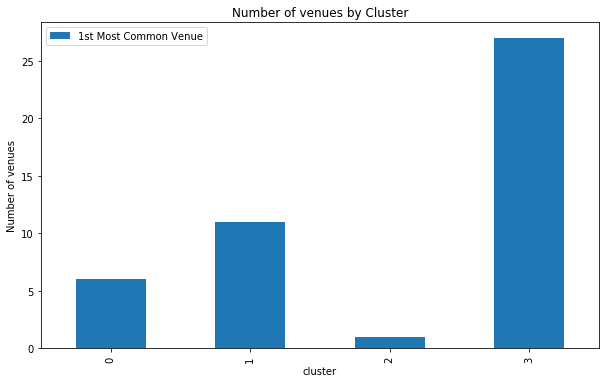

In [97]:
count, bin_edges = np.histogram(grouped_df_1['1st Most Common Venue'])


grouped_df_1.plot(kind='bar', figsize=(10, 6), xticks=bin_edges)

plt.xlabel('cluster') # add to x-label to the plot
plt.ylabel('Number of venues') # add y-label to the plot
plt.title('Number of venues by Cluster') # add title to the plot

plt.show()